............................Mid-Boot-Camp-Project..............................

Questions to be answered:

    1 : Understanding what content is available in different countries.
    
    2 : Does Netflix has more focus on TV Shows than movies (finding the number of TV shows vs Movies/Ratio of movies to TV Serials).
    
    3 : Network analysis of Actors / Directors and find others insights.

In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [23]:
#exploring the data
df = pd.read_csv("data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [18]:
df.shape

(8807, 12)

In [19]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [20]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [24]:
#as we can see that there are NaN values in director, cast, country, date added, grade and duration.
#The main variables to consider here would be the director,cast if there is at all there is an analysis to be done to count.. 
#The other main variable here is the country because that can give many other analysis. 
#The other variables we can get rid of the null variables in them. 

In [26]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [27]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [30]:
df['director'] = df['director'].fillna('NoData')

In [31]:
df['cast'] = df['cast'].fillna('NoData')

In [32]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [33]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [34]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [41]:
df.dropna(subset=['duration'],inplace=True)

In [42]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
#showing the ratio of Movies and Tv-Serials

Text(0.5, 1.0, 'Ratio of Movie/TV Show')

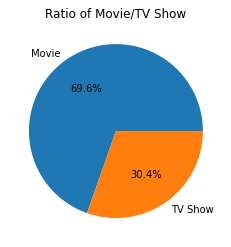

In [77]:
plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct="%.1f%%")
plt.title('Ratio of Movie/TV Show')

In [58]:
#showing the type of content. Got the defination of the list of 'type' column from Google. 

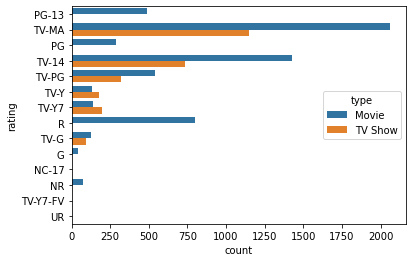

In [71]:
sns.countplot(data=df , y='rating' , hue = 'type')
plt.show()

In [ ]:
#adding few columns for better understanding the column 'rating'

In [80]:
df['date_added']= pd.to_datetime(df['date_added'])

In [82]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [83]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NoData,NoData,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NoData,NoData,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [84]:
#df['year'] = pd.DatetimeIndex(df['date_added']).year
#df['month'] = pd.DatetimeIndex(df['date_added']).month
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [86]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NoData,NoData,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8803,s8804,TV Show,Zombie Dumb,NoData,NoData,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


<Figure size 1440x1080 with 0 Axes>

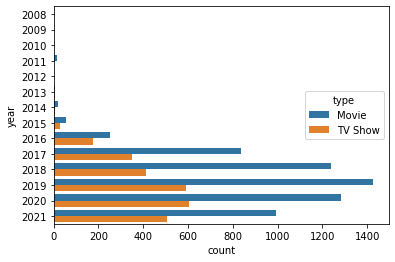

<Figure size 1440x1080 with 0 Axes>

In [91]:
sns.countplot(data=df , y='year' , hue = 'type')
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

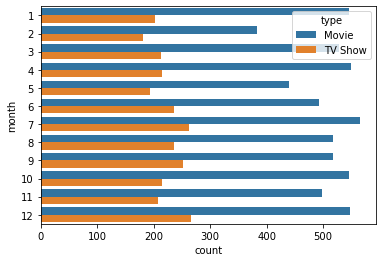

<Figure size 1440x1080 with 0 Axes>

In [108]:
sns.countplot(data=df , y='month' , hue = 'type')
plt.figure(figsize=(20,15))

We can see that year 2019 was the year with the highest amount of movies but 2020 was the year with the highest number of TV-Serials.
Also, we can see each month number of movies is higher than TV-Serials

In [109]:
#Understanding which countries have the highest movies content

<AxesSubplot:xlabel='country', ylabel='count'>

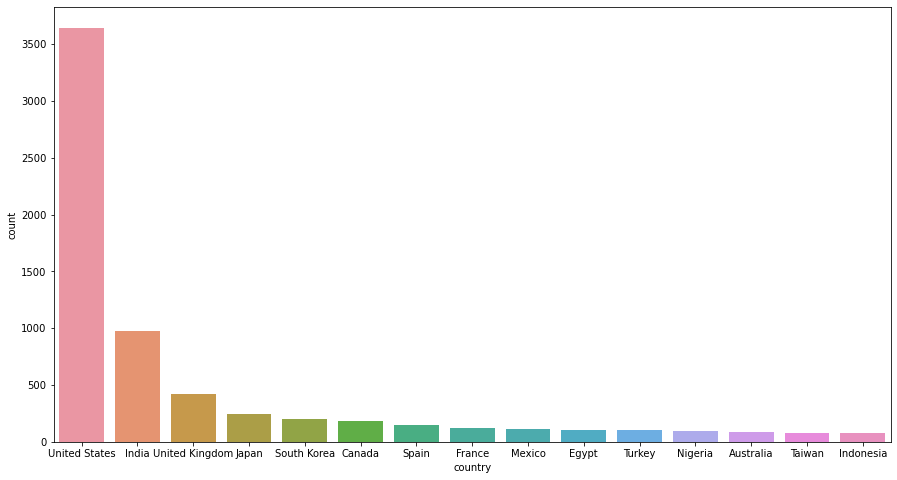

In [110]:
plt.figure(figsize=(15,8))
sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:15])

In [111]:
#Understanding which countries have the highest TV-Serials content

<AxesSubplot:xlabel='country', ylabel='count'>

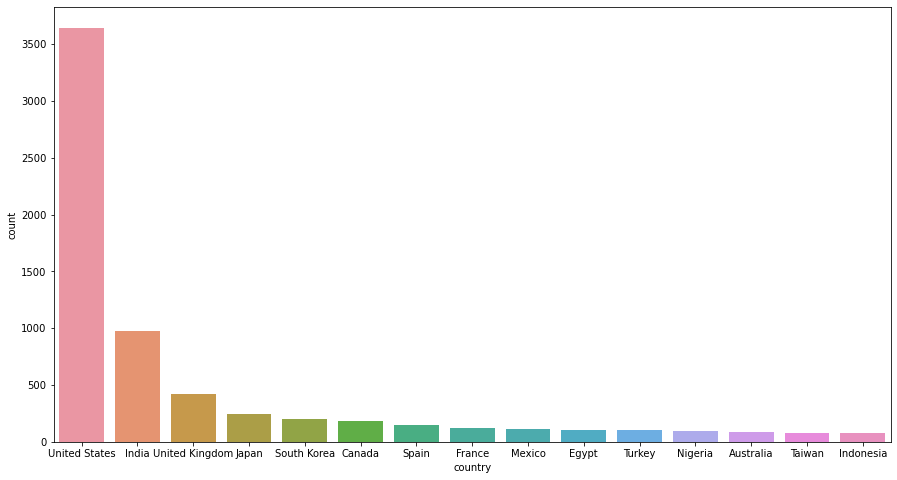

In [112]:
plt.figure(figsize=(15,8))
sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:15])


In [113]:
cols = ['listed_in','country']
gen_country = df[cols]
gen_country.head(20)

,listed_in,country
0,Documentaries,United States
1,"International TV Shows, TV Dramas, TV Mysteries",South Africa
2,"Crime TV Shows, International TV Shows, TV Act...",United States
3,"Docuseries, Reality TV",United States
4,"International TV Shows, Romantic TV Shows, TV ...",India
5,"TV Dramas, TV Horror, TV Mysteries",United States
6,Children & Family Movies,United States
7,"Dramas, Independent Movies, International Movies","United States, Ghana, Burkina Faso, United Kin..."
8,"British TV Shows, Reality TV",United Kingdom
9,"Comedies, Dramas",United States
